In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_data.isnull().sum().sum()

0

In [6]:
test_data.isnull().sum().sum()

0

Check to see how many images fall under each class

In [7]:
y = train_data.label
y.shape
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

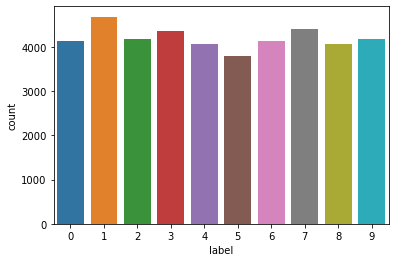

In [8]:
sns.countplot(y)

In [9]:
X = train_data.drop('label', axis=1)
X.shape

(42000, 784)

In [10]:
dim = int(math.sqrt(X.shape[1]))
print("The images are " + str(dim) + " x " + str(dim))

The images are 28 x 28


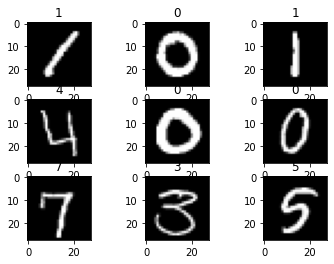

In [11]:
X_vis = X.values.reshape(X.shape[0], dim, dim)

for i in range(0,9):
    plt.subplot(330+(i+1))
    plt.imshow(X_vis[i], cmap=plt.get_cmap('gray'))
    plt.title(y[i])
    

In [12]:
X.head(15)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

def train_nn(layer_num, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=layer_num)
    mlp.fit(train_features, train_labels)
    return mlp
    
def test_nn(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df['correct_label'] == train_test_df['predicted_label']) / len(train_test_df)
    return overall_accuracy

def cross_validate_nn(k, splits):
    kf = KFold(n_splits=splits, shuffle=False, random_state=2)
    fold_accuracies = []
    
    for train_index, test_index in kf.split(X):
        train_features, test_features = X.loc[train_index], X.loc[test_index]
        train_labels, test_labels = y.loc[train_index], y.loc[test_index]
        
        model = train_nn(k, train_features, train_labels)
        accuracy = test_nn(model, test_features, test_labels)
        fold_accuracies.append(accuracy)
    return fold_accuracies

In [14]:
nn_two_layers = [
    (8,8),
    (16,16),
    (32,32),
    (64,64),
    (128,128),
    (256,256),
]

two_layer_accuracies = []

for n in nn_two_layers:
    two_layer_accuracies.append(np.mean(cross_validate_nn(n, 4)))
    
print(two_layer_accuracies)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to i

[0.8272380952380951, 0.9046190476190477, 0.9416666666666667, 0.9490238095238095, 0.9552857142857143, 0.9665476190476191]


In [15]:
nn_three_layers = [
    (8,8,8),
    (16,16,16),
    (32,32,32),
    (64,64,64),
    (128,128,128),
    (256,256,256)
]

three_layer_accuracies = []

for n in nn_three_layers:
    three_layer_accuracies.append(np.mean(cross_validate_nn(n, 4)))
    
print(three_layer_accuracies)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.ma

[0.8736190476190476, 0.9197142857142857, 0.9399285714285714, 0.957952380952381, 0.9619523809523809, 0.9712380952380953]


In [16]:
optimal_nn = (256,256,256)

model = train_nn(optimal_nn, X, y)
predictions = model.predict(test_data)

print(predictions)

[2 0 9 ... 3 9 2]


In [17]:
submission = pd.DataFrame(test_data.index, columns=['ImageId'])

submission['ImageId'] = submission['ImageId'] + 1

submission['Label'] = predictions
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [18]:
submission.to_csv("submission.csv",index=False)